In [12]:
from nuscenes.nuscenes import NuScenes
from nuscenes.prediction.helper import PredictHelper
from nuscenes.eval.prediction.splits import get_prediction_challenge_split

DATAROOT = '/home/hyerim/data/sets/nuscenes'
nusc = NuScenes('v1.0-mini', dataroot=DATAROOT)
dataset = get_prediction_challenge_split("mini_train", dataroot=DATAROOT)

helper = PredictHelper(nusc)
instance_token, sample_token = dataset[0].split("_")

sample_annotation = helper.get_sample_annotation(instance_token, sample_token)

my_scene = nusc.scene[0]
first_sample_token = my_scene['first_sample_token']
log_location = nusc.get('log', my_scene['log_token'])
map_name = log_location['location']

LIDAR_sample = nusc.get('sample', first_sample_token)['data']['LIDAR_TOP']
ego_position = nusc.get('ego_pose', LIDAR_sample)['translation']

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.512 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [13]:

# def _get_layer_geom(
#                     patch_box,
#                     patch_angle,
#                     layer_name):
#     """
#     Wrapper method that gets the geometries for each layer.
#     :param patch_box: Patch box defined as [x_center, y_center, height, width].
#     :param patch_angle: Patch orientation in degrees.
#     :param layer_name: Name of map layer to be converted to binary map mask patch.
#     :return: List of geometries for the given layer.
#     """
#     if layer_name in self.map_api.non_geometric_polygon_layers:
#         return self._get_layer_polygon(patch_box, patch_angle, layer_name)
#     elif layer_name in self.map_api.non_geometric_line_layers:
#         return self._get_layer_line(patch_box, patch_angle, layer_name)
#     else:
#         raise ValueError("{} is not a valid layer".format(layer_name))


# def get_map_geom(patch_box,
#                     patch_angle,
#                     layer_names):
#     """
#     Returns a list of geometries in the specified patch_box.
#     These are unscaled, but aligned with the patch angle.
#     :param patch_box: Patch box defined as [x_center, y_center, height, width].
#     :param patch_angle: Patch orientation in degrees.
#                         North-facing corresponds to 0.
#     :param layer_names: A list of layer names to be extracted, or None for all non-geometric layers.
#     :return: List of layer names and their corresponding geometries.
#     """
#     # Get each layer name and geometry and store them in a list.
#     map_geom = []
#     for layer_name in layer_names:
#         layer_geom = self._get_layer_geom(patch_box, patch_angle, layer_name)
#         if layer_geom is None:
#             continue
#         map_geom.append((layer_name, layer_geom))
    

#     return map_geom

# import numpy as np

# def _get_polygon_bounds(self, layer_name: str, token: str):
#     """
#     Get the extremities of the polygon object that corresponds to a non geometric record.
#     :param layer_name: Name of the layer that we are interested in.
#     :param token: Token of the record.
#     :return: min_x, min_y, max_x, max_y of of the polygon or polygons (for drivable_area) representation.
#     """

#     record = self.map_api.get(layer_name, token)

#     if layer_name == 'drivable_area':
#         polygons = [self.map_api.get('polygon', polygon_token) for polygon_token in record['polygon_tokens']]
#         exterior_node_coords = []

#         for polygon in polygons:
#             nodes = [self.map_api.get('node', node_token) for node_token in polygon['exterior_node_tokens']]
#             node_coords = [(node['x'], node['y']) for node in nodes]
#             exterior_node_coords.extend(node_coords)

#         exterior_node_coords = np.array(exterior_node_coords)
#     else:
#         exterior_nodes = [self.map_api.get('node', token) for token in record['exterior_node_tokens']]
#         exterior_node_coords = np.array([(node['x'], node['y']) for node in exterior_nodes])

#     xs = exterior_node_coords[:, 0]
#     ys = exterior_node_coords[:, 1]

#     x2 = xs.max()
#     x1 = xs.min()
#     y2 = ys.max()
#     y1 = ys.min()

from shapely.geometry import box, MultiPolygon
from shapely import affinity

def get_patch_coord(patch_box,
                    patch_angle):
    """
    Convert patch_box to shapely Polygon coordinates.
    :param patch_box: Patch box defined as [x_center, y_center, height, width].
    :param patch_angle: Patch orientation in degrees.
    :return: Box Polygon for patch_box.
    """
    patch_x, patch_y, patch_h, patch_w = patch_box

    x_min = patch_x - patch_w / 2.0
    y_min = patch_y - patch_h / 2.0
    x_max = patch_x + patch_w / 2.0
    y_max = patch_y + patch_h / 2.0

    patch = box(x_min, y_min, x_max, y_max)
    patch = affinity.rotate(patch, patch_angle, origin=(patch_x, patch_y), use_radians=False)

    return patch

09d10127-a4e9-4c3c-a776-51db4c971f62
POLYGON ((344.9027221434599 1485.978019238201, 340.5504461112442 1501.847958325694, 336.7942081997032 1515.748208851376, 330.7973034415235 1537.01407916953, 329.5577311749576 1541.575346790761, 326.3925636275809 1540.582194198128, 328.9138688581751 1531.506867189952, 331.5175115864239 1522.138184555282, 333.6197958516388 1514.816457824502, 335.6646736609376 1507.250577028191, 341.4392885895786 1484.954558631602, 344.9027221434599 1485.978019238201))
ee2da764-6eba-4e38-9206-03d1c5307e3a
POLYGON ((345.7720232924004 1410.074916867208, 350.2192986318768 1407.654390191587, 350.6057521118962 1408.014463630222, 351.8684767137901 1408.831234634072, 353.0847839656397 1410.03549479213, 354.2379033714262 1411.465304725179, 351.0681235974202 1414.612630331639, 350.1963837657966 1413.055740401831, 348.8460696014137 1411.602279185851, 347.1271150591411 1410.37648232771, 345.7720232924004 1410.074916867208))
6d40d6fd-4501-4e30-9f7d-87755baa22f5
POLYGON ((853.08174

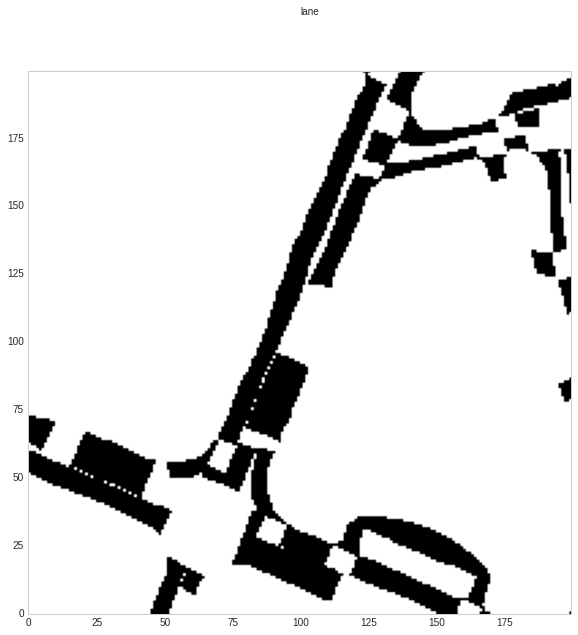

In [16]:
from nuscenes.map_expansion.map_api import NuScenesMap
import matplotlib.pyplot as plt
from nuscenes.eval.prediction.splits import get_prediction_challenge_split

dataroot='/home/hyerim/data/sets/nuscenes'
train_set = get_prediction_challenge_split("mini_train", dataroot=dataroot)
instance, sample = train_set[0].split('_')
nusc_map = NuScenesMap(dataroot=dataroot, map_name='singapore-onenorth')
bounding_box_size_limit =100
patch_box = (ego_pos_x, ego_pos_y, bounding_box_size_limit*2, bounding_box_size_limit*2)

patch_angle = 0  # Default orientation where North is up
layer_names = ['lane']
layer_name_check = 'lane'
canvas_size = (bounding_box_size_limit*2, bounding_box_size_limit*2)
map_mask = nusc_map.get_map_mask(patch_box, patch_angle, layer_names, canvas_size)

###############################################
records = getattr(nusc_map, layer_name_check)

patch_x = patch_box[0]
patch_y = patch_box[1]

patch = get_patch_coord(patch_box, patch_angle)
polygon_list = []
for record in records:
    print(record['polygon_token'])
    polygon = nusc_map.extract_polygon(record['polygon_token'])
    print(polygon)
    if polygon.is_valid:
                new_polygon = polygon.intersection(patch)
                if not new_polygon.is_empty:
                    new_polygon = affinity.rotate(new_polygon, -patch_angle,
                                                origin=(patch_x, patch_y), use_radians=False)
                    new_polygon = affinity.affine_transform(new_polygon,
                                                            [1.0, 0.0, 0.0, 1.0, -patch_x, -patch_y])
                    if new_polygon.geom_type is 'Polygon':
                        new_polygon = MultiPolygon([new_polygon])
                    polygon_list.append(new_polygon)
print(polygon_list)

#     record = self.map_api.get(layer_name, token)

#         exterior_nodes = [self.map_api.get('node', token) for token in record['exterior_node_tokens']]
#         exterior_node_coords = np.array([(node['x'], node['y']) for node in exterior_nodes])

#     xs = exterior_node_coords[:, 0]
#     ys = exterior_node_coords[:, 1]

#     x2 = xs.max()
#     x1 = xs.min()
#     y2 = ys.max()
#     y1 = ys.min()

# map_geom = get_map_geom(patch_box, patch_angle, layer_names)
# print(map_geom)
print(map_mask)



figsize= (10,10)
map_name = 'singapore-onenorth'
fig, ax = nusc_map.render_map_mask(patch_box, patch_angle, layer_names, canvas_size, figsize=figsize, n_row=1)
plt.savefig(f"{map_name}_plot", bbox_inches = 'tight')

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.268 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
0 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 39586f9d59004284a7114a68825e8eec


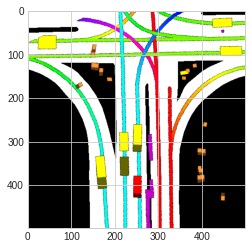

1 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 356d81f38dd9473ba590f39e266f54e5


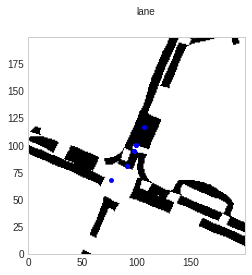

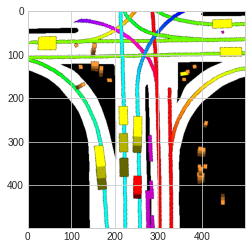

2 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 e0845f5322254dafadbbed75aaa07969


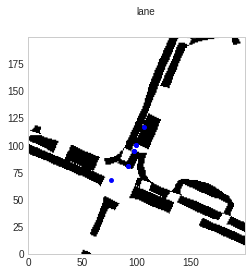

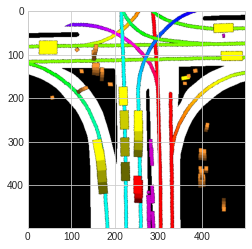

3 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 c923fe08b2ff4e27975d2bf30934383b


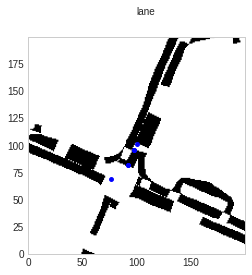

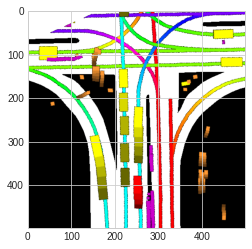

4 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 f1e3d9d08f044c439ce86a2d6fcca57b


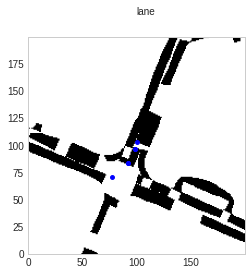

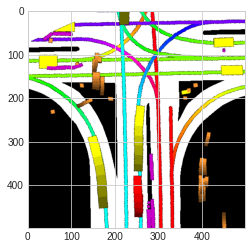

5 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 4f545737bf3347fbbc9af60b0be9a963


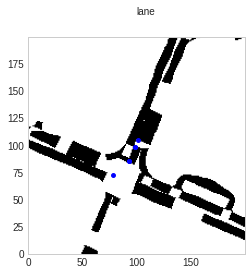

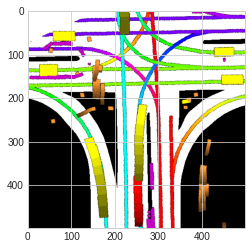

6 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 7626dde27d604ac28a0240bdd54eba7a


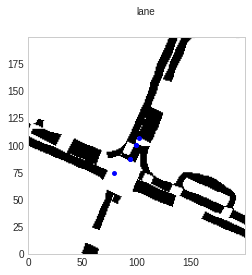

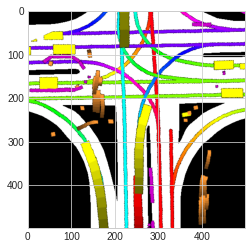

7 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 be99ffc878b24aca8956bbb4e0f97d0c


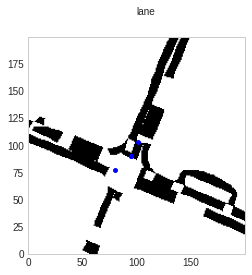

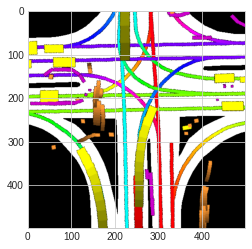

8 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 9813c23a5f1448b09bb7910fea9baf20


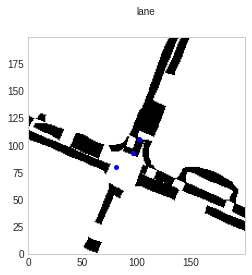

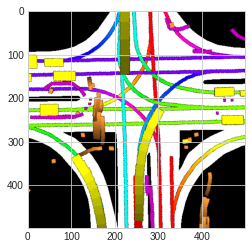

9 th : 
bc38961ca0ac4b14ab90e547ba79fbb6 023c4df2d451409881d8e6ea82f14704


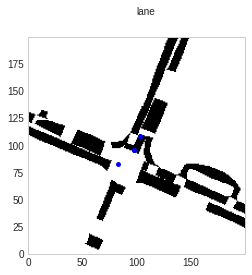

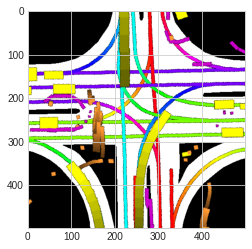

10 th : 
a60047adc78a4b6895702e86b6d2fe88 39586f9d59004284a7114a68825e8eec


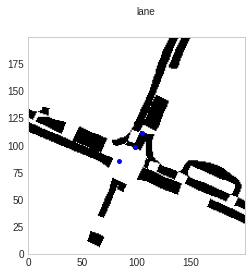

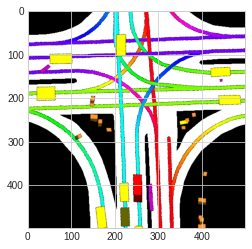

11 th : 
a60047adc78a4b6895702e86b6d2fe88 356d81f38dd9473ba590f39e266f54e5


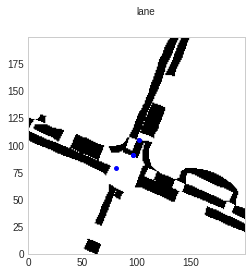

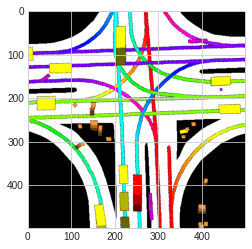

12 th : 
a60047adc78a4b6895702e86b6d2fe88 e0845f5322254dafadbbed75aaa07969


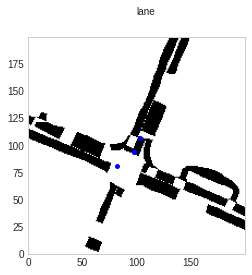

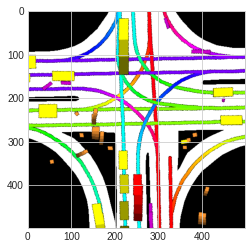

13 th : 
a60047adc78a4b6895702e86b6d2fe88 c923fe08b2ff4e27975d2bf30934383b


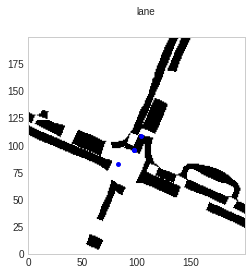

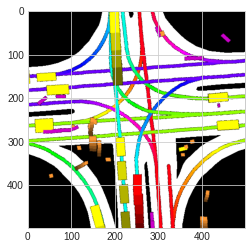

14 th : 
a60047adc78a4b6895702e86b6d2fe88 f1e3d9d08f044c439ce86a2d6fcca57b


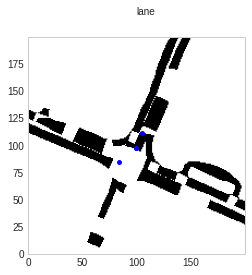

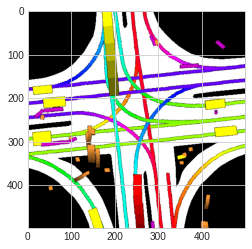

KeyboardInterrupt: 

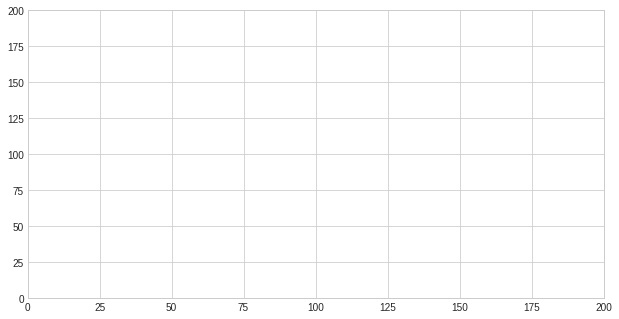

In [31]:
from_ego = 0
bounding_box_size_limit = 100    # 단위 meter
def plot_segment(lane_token, ego_pos_x, ego_pos_y):
    global from_ego
    outgoing_lane = nusc_map._get_connected_lanes(lane_token, 'outgoing')
    
    from_ego = from_ego +1

    for i in range(len(outgoing_lane)):
        outgoing_lane_info = nusc_map.get_arcline_path(outgoing_lane[i])
        x_after = outgoing_lane_info[0]['end_pose'][0]
        y_after = outgoing_lane_info[0]['end_pose'][1]
        if from_ego > 100:
            return
        
        if abs(x_after - ego_pos_x)>bounding_box_size_limit  or abs(y_after - ego_pos_y)>bounding_box_size_limit:
            return 
        plt.scatter(outgoing_lane_info[0]['start_pose'][0]-ego_pos_x+bounding_box_size_limit, outgoing_lane_info[0]['start_pose'][1]-ego_pos_y+bounding_box_size_limit, c='b', s=15)
        plt.scatter(x_after-ego_pos_x+bounding_box_size_limit, y_after-ego_pos_y+bounding_box_size_limit, c='b' , s=15)
        plot_segment(outgoing_lane[i], ego_pos_x, ego_pos_y)

from dataset import NuSceneDataset
dataset = NuSceneDataset(train_mode=True)
for i in range(dataset.__len__()):
    [ego_pos_x, ego_pos_y, _ ]  = dataset.__getitem__(i)['ego_cur_pos']


    patch_box = (ego_pos_x, ego_pos_y, bounding_box_size_limit*2, bounding_box_size_limit*2)
    patch_angle = 0  # Default orientation where North is up
    layer_names = ['lane']
    canvas_size = (bounding_box_size_limit*2, bounding_box_size_limit*2)
    map_mask = nusc_map.get_map_mask(patch_box, patch_angle, layer_names, canvas_size)

    figsize= (8,4)
    fig, ax = nusc_map.render_map_mask(patch_box, patch_angle, layer_names, canvas_size, figsize=figsize, n_row=1)
        
    closest_lane = nusc_map.get_closest_lane(ego_pos_x, ego_pos_y, radius=2)
    # first_outgoing_lane = nusc_map._get_connected_lanes(closest_lane, 'outgoing')
    first_incoming_lane = nusc_map._get_connected_lanes(closest_lane, 'incoming')

    for i in range(len(first_incoming_lane)):
        plot_segment(first_incoming_lane[i], ego_pos_x=ego_pos_x, ego_pos_y=ego_pos_y)